In [4]:
import time
import pandas as pd
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


name = []
data=[]
like = []
path = "chromedriver.exe"
with Chrome(executable_path=path) as driver:                                                         #크롤링할 크롬 실행
    wait = WebDriverWait(driver,1)                                                                  #실행 후 3초 대기
    driver.get("https://www.youtube.com/watch?v=RoeSRZUs6h0&t=368s")                                #크롤링할 유튜브 Url           

    for item in range(10):                                                                          #더보기 횟수 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)  
        time.sleep(2)                                                                               #더보기 후 대기 시간(초)

    for nickname in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#author-text > span"))): #아이디 태그()
        name.append(nickname.text)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):        #댓글 태그 
        data.append(comment.text)

df=pd.DataFrame({"Users":name, "comment":data }) #위에서 구한 LIST를 Column으로 하는 dataframe만들기. 
df

,Users,comment
0,Kyweo,이 경기가 더더 레전드인 이유 : 한 선수가 한 선수에게 4골 4어시를 서로 준게 ...
1,,손날두
2,LIK,13:50 손흥민한테 수비다몰림 ㄷㄷ
3,신수란,이 영상은 이제 토트넘이 못하면 조회수가 올라가고 잘하면 안올라갑니다
4,성지원,맨유전 보고오신분? 출첵하고 가세요\n맨시티전 보고 오신분도 출첵하고 가세요\n아스...
...,...,...
175,LilacP,여긴 10년 후에도 댓글이 달리겠구만.
176,rogono,손흥민같은 선수 상대로 수비 라인 올리니까 박살나지 ㅋㅋ 스프린트 속도가 너무 빠른...
177,테일러,10년 20년뒤에도 이 영상만큼은 두고두고 다시 볼 것 같다..
178,비티오,토트넘 넘 잘함


In [5]:
# 댓글내용만 추출
comments = df[['comment']].values.tolist()
comments

[['이 경기가 더더 레전드인 이유 : 한 선수가 한 선수에게 4골 4어시를 서로 준게 프리미어리그 역사상 최초'],
 ['손날두'],
 ['13:50 손흥민한테 수비다몰림 ㄷㄷ'],
 ['이 영상은 이제 토트넘이 못하면 조회수가 올라가고 잘하면 안올라갑니다'],
 ['맨유전 보고오신분? 출첵하고 가세요\n맨시티전 보고 오신분도 출첵하고 가세요\n아스날전 보기전에 오신분들도 출첵들 하고 가세요~~^^\n아스날전 보고 오신분들도 출첵하세요'],
 ['손흥민의 최고의 시즌이 될 것 같습니다. 이 기운을 받아 우리 모두에게 좋은 일 많이 생겼으면 좋겠습니다^^'],
 ['05:51 은돔벨레 기점도르 ㄷㄷ'],
 ['5:52 이 달의 골 장면'],
 ['5:55 진짜 ㅈ나 빠르네 ㅋㅋㅋㅋㅋ'],
 ['12:04 손흥민 앞으로 질주할거같으니까 수비 3명 다 뒷걸음질..'],
 ['단 하루 사이에\n손흥민: epl 득점왕\n케인: epl 도움왕\n베일: epl 골프왕'],
 ['케인이 손흥민 스프린트믿고 그냥 막질러주네 ㅋㅋ'],
 ['9:51 케인 보지도 않고 그냥 앞에 뿌리는게  손흥민이 거기 있을거라고 확신하고 준듯 ㄷㄷ'],
 ['진짜 몇번을 돌러보는지 몰겠다.\n코로나로 회사힘들고 나도 힘들고 가족도 힘들고...힘들고힘들고...기분좋은 힐링을위해 자꾸보게된다. 그리고 행복해진다.\n꼭~내가 꼴~~인 그것도 해트트릭 이상 포커 한것처럼...어린아이처럼 돟아한다.'],
 ['11:57 ㅠㅠ 진짜 죽어라 따라붙네 필립스 흑'],
 ['MOM: 한반도프스키 , 케인 데브라이너'],
 ['손흥민 골넣을때 골대 찰랑거리는 소리 개좋네'],
 ['13:47 수비 4명 붙는거봐 ㅋㅋㅋㅋ'],
 ['진짜 이거 보면서 와 손흥민 잘한다...가 아니라\n뭐야 손흥민 왜저래? 밖에 안나왔음ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'],
 ['손흥민 재평가 시급!'],
 ['와 ㅅㅂ 한국 선수가 프리미어리그에서 한 경기 4골을 박는 걸 내눈으로 보다니'],
 ['7:10 케인 노룩패스 손흥민 믿고 때리는거

In [6]:
comment_txt = ''
for i in comments:
    i[0].strip()
    comment_txt += i[0]
comment_txt

'이 경기가 더더 레전드인 이유 : 한 선수가 한 선수에게 4골 4어시를 서로 준게 프리미어리그 역사상 최초손날두13:50 손흥민한테 수비다몰림 ㄷㄷ이 영상은 이제 토트넘이 못하면 조회수가 올라가고 잘하면 안올라갑니다맨유전 보고오신분? 출첵하고 가세요\n맨시티전 보고 오신분도 출첵하고 가세요\n아스날전 보기전에 오신분들도 출첵들 하고 가세요~~^^\n아스날전 보고 오신분들도 출첵하세요손흥민의 최고의 시즌이 될 것 같습니다. 이 기운을 받아 우리 모두에게 좋은 일 많이 생겼으면 좋겠습니다^^05:51 은돔벨레 기점도르 ㄷㄷ5:52 이 달의 골 장면5:55 진짜 ㅈ나 빠르네 ㅋㅋㅋㅋㅋ12:04 손흥민 앞으로 질주할거같으니까 수비 3명 다 뒷걸음질..단 하루 사이에\n손흥민: epl 득점왕\n케인: epl 도움왕\n베일: epl 골프왕케인이 손흥민 스프린트믿고 그냥 막질러주네 ㅋㅋ9:51 케인 보지도 않고 그냥 앞에 뿌리는게  손흥민이 거기 있을거라고 확신하고 준듯 ㄷㄷ진짜 몇번을 돌러보는지 몰겠다.\n코로나로 회사힘들고 나도 힘들고 가족도 힘들고...힘들고힘들고...기분좋은 힐링을위해 자꾸보게된다. 그리고 행복해진다.\n꼭~내가 꼴~~인 그것도 해트트릭 이상 포커 한것처럼...어린아이처럼 돟아한다.11:57 ㅠㅠ 진짜 죽어라 따라붙네 필립스 흑MOM: 한반도프스키 , 케인 데브라이너손흥민 골넣을때 골대 찰랑거리는 소리 개좋네13:47 수비 4명 붙는거봐 ㅋㅋㅋㅋ진짜 이거 보면서 와 손흥민 잘한다...가 아니라\n뭐야 손흥민 왜저래? 밖에 안나왔음ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ손흥민 재평가 시급!와 ㅅㅂ 한국 선수가 프리미어리그에서 한 경기 4골을 박는 걸 내눈으로 보다니7:10 케인 노룩패스 손흥민 믿고 때리는거 지리네.. 무슨 게임처럼 득점하누SONDAY\n\n05:53\n\n07:10\n\n09:3009:56 라멜라 0.2골주자 ㅋㅋㅋㅋ 잘막네손흥민이 편하게 넣는다고 쉬운골이 아니다손흥민 5대리그 다 합쳐서 아시아인 최초 포트트릭 이라네요 ㅎㄷㄷ이게 양발잡이지 오른발 두

In [7]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 

In [8]:
wordcloud = WordCloud(font_path='./ttf/NanumGothic.ttf',
                     background_color='white',
                      colormap = 'Accent_r',# 폰트 색깔 정하기
                      width = 800, height = 800).generate(comment_txt)

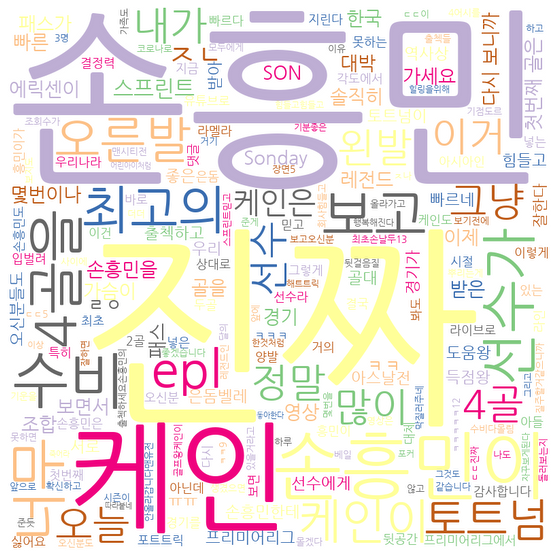

In [9]:
plt.figure(figsize=(10,10)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

In [10]:
# 불용어 제거 
from wordcloud import STOPWORDS
 
stopwords = set(STOPWORDS) 
words_del= ['가세요','너무','내가','그냥']
for i in words_del:
    stopwords.add(i) 

# wordcloud = WordCloud(font_path='./ttf/NanumGothic.ttf',stopwords=stopwords,background_color='white').generate(string)
wordcloud = WordCloud(font_path='./ttf/NanumGothic.ttf',
                      stopwords=stopwords,
                     background_color='white',
                      colormap = 'Accent_r',# 폰트 색깔 정하기
                      width = 800, height = 800).generate(comment_txt)

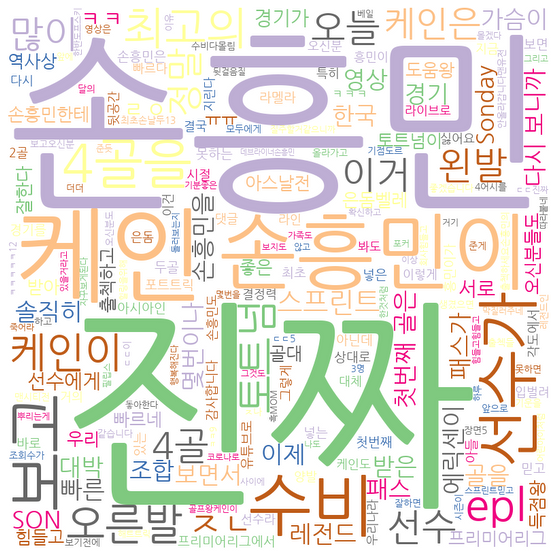

In [11]:
fig = plt.figure(figsize=(10,10)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

In [12]:
fig.savefig('./img/youtube_comments_wordcloud.png')